In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import theano as th
import theano.tensor as tt
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb
import g3py as g3
import pymc3 as pm

g3.style_seaborn()
#g3.style_normal()
#g3.style_big()
#g3.style_big_seaborn()
g3.style_widget()


th.config.NanGuardMode.big_is_error = False
#th.config.mode = 'DebugMode'
#th.config.mode = 'FAST_RUN'
th.config.exception_verbosity = 'high'

# Data

In [2]:
#x, y = g3.load_sunspots()
x, y = g3.load_co2()
x = x-x[0]

+-------+-------------------+
| co2   | R Documentation   |
+-------+-------------------+

Mauna Loa Atmospheric CO2 Concentration
---------------------------------------

Description
~~~~~~~~~~~

Atmospheric concentrations of CO\ *2* are expressed in parts per million
(ppm) and reported in the preliminary 1997 SIO manometric mole fraction
scale.

Usage
~~~~~

::

    co2

Format
~~~~~~

A time series of 468 observations; monthly from 1959 to 1997.

Details
~~~~~~~

The values for February, March and April of 1964 were missing and have
been obtained by interpolating linearly between the values for January
and May of 1964.

Source
~~~~~~

Keeling, C. D. and Whorf, T. P., Scripps Institution of Oceanography
(SIO), University of California, La Jolla, California USA 92093-0220.

`ftp://cdiac.esd.ornl.gov/pub/maunaloa-co2/maunaloa.co2 <ftp://cdiac.esd.ornl.gov/pub/maunaloa-co2/maunaloa.co2>`__.

References
~~~~~~~~~~

Cleveland, W. S. (1993) *Visualizing Data*. New Jersey: Summit Press.

Ex

In [3]:
obs_j, x_obs, y_obs, test_j, x_test, y_test = g3.random_obs(x, y, 0.5, 0.5)

Total: 468 | Obs: 117 (25.0%)


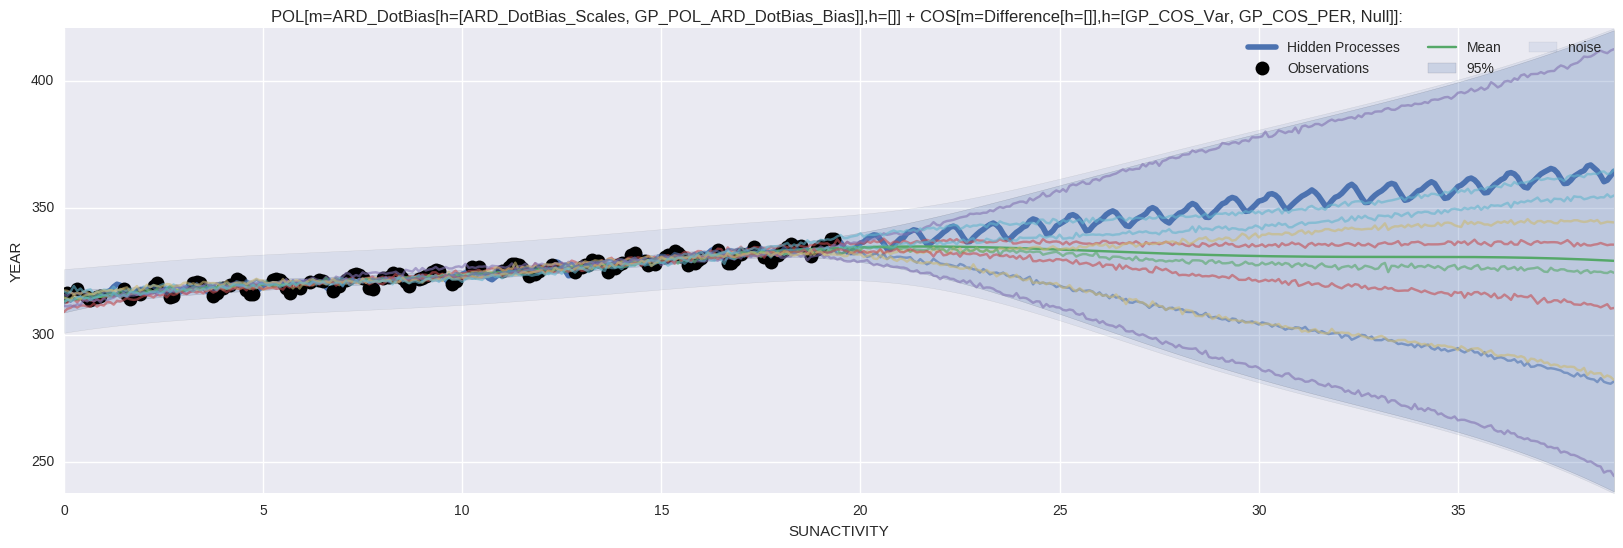

In [4]:
with g3.Model() as model:
    m = g3.Zero()
    k = g3.POL(x,2) + g3.COS(x) #g3.SM(x, name='SM1') + g3.SM(x, name='SM2')
    gp = g3.GP(x, m, k, noise=True, hidden=y)
    gp.describe(str(k),'SUNACTIVITY','YEAR')
    gp.observed(x_obs,y_obs)
    #gp.testing(x_test,y_test)
    gp.compile()
gp.plot_gp(gp.find_default(), samples=10)

In [8]:
gp.find_default()

{'ARD_DotBias_Scales_log_': array([ 0.6006608], dtype=float32),
 'GP_COS_PER_log_': array([ 2.96183085], dtype=float32),
 'GP_COS_Var_log_': array(3.5702383518218994, dtype=float32),
 'GP_Noise_Var_log_': array(3.5702383518218994, dtype=float32),
 'GP_POL_ARD_DotBias_Bias_log_': array([ 3.49159265], dtype=float32),
 'Null': array([ 0.16666667], dtype=float32)}

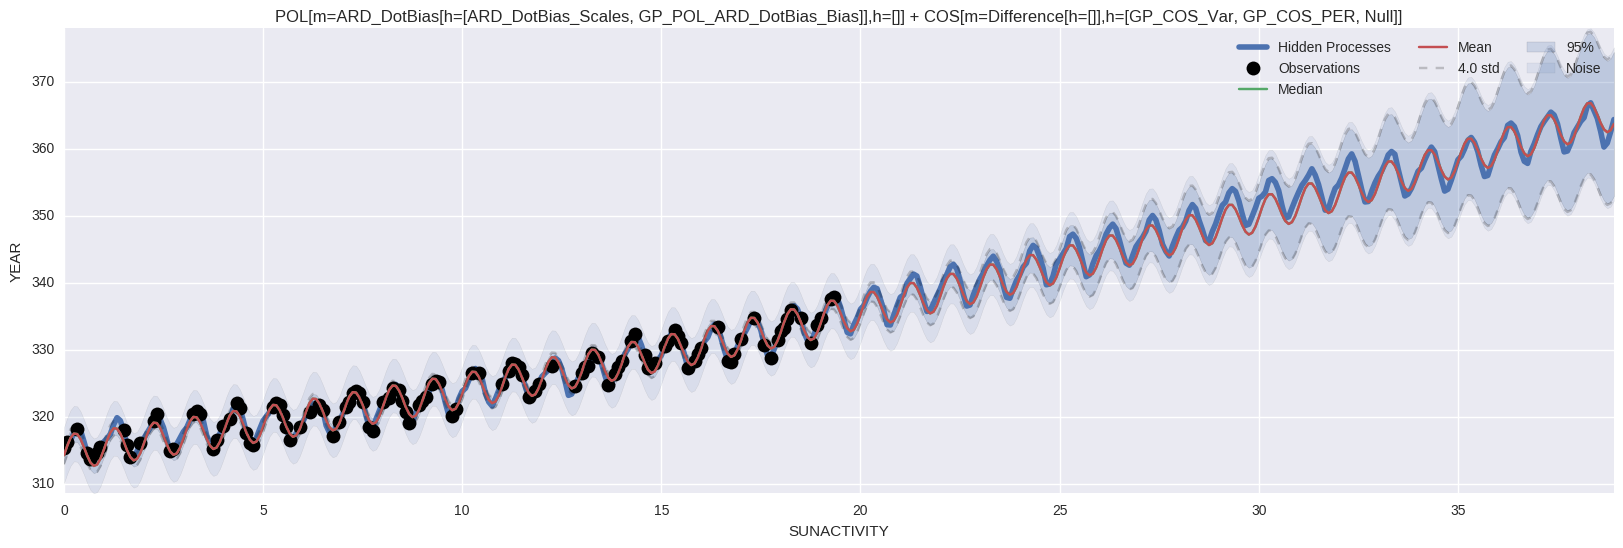

In [9]:
gp.widget_params()

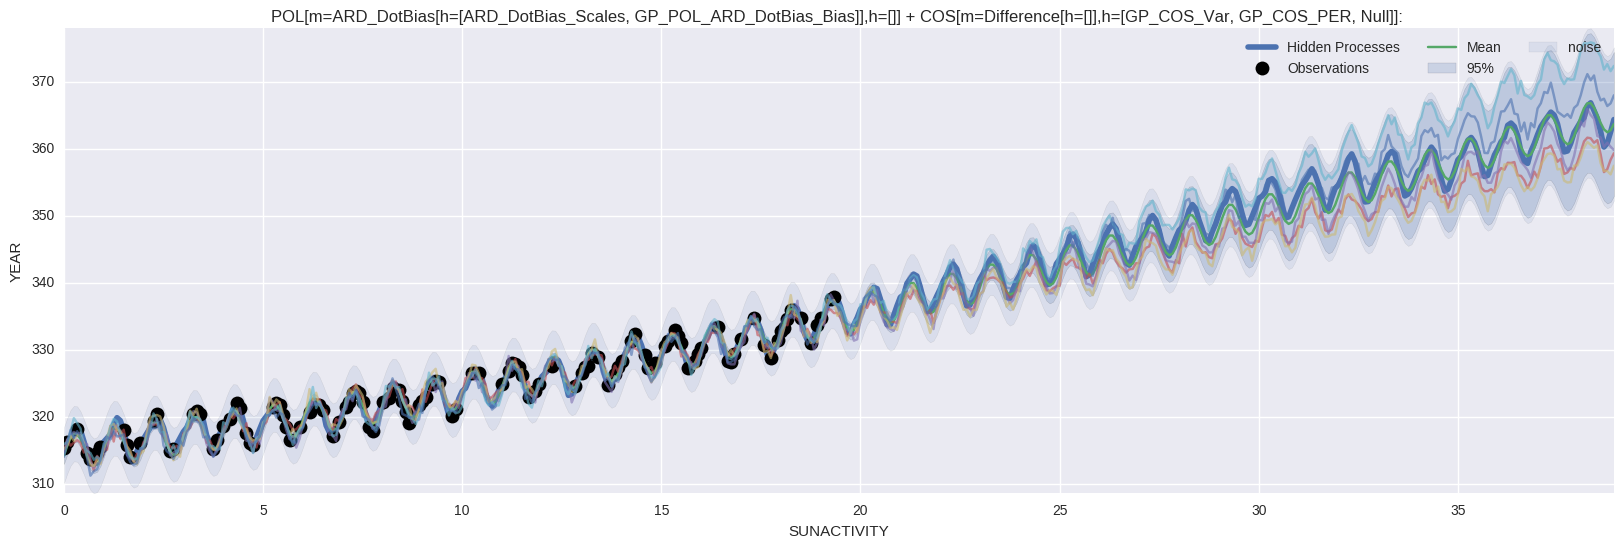

In [10]:
gp.plot_gp(gp.get_params(), samples=5)

         Current function value: 147.128859
         Iterations: 15
         Function evaluations: 98
         Gradient evaluations: 88


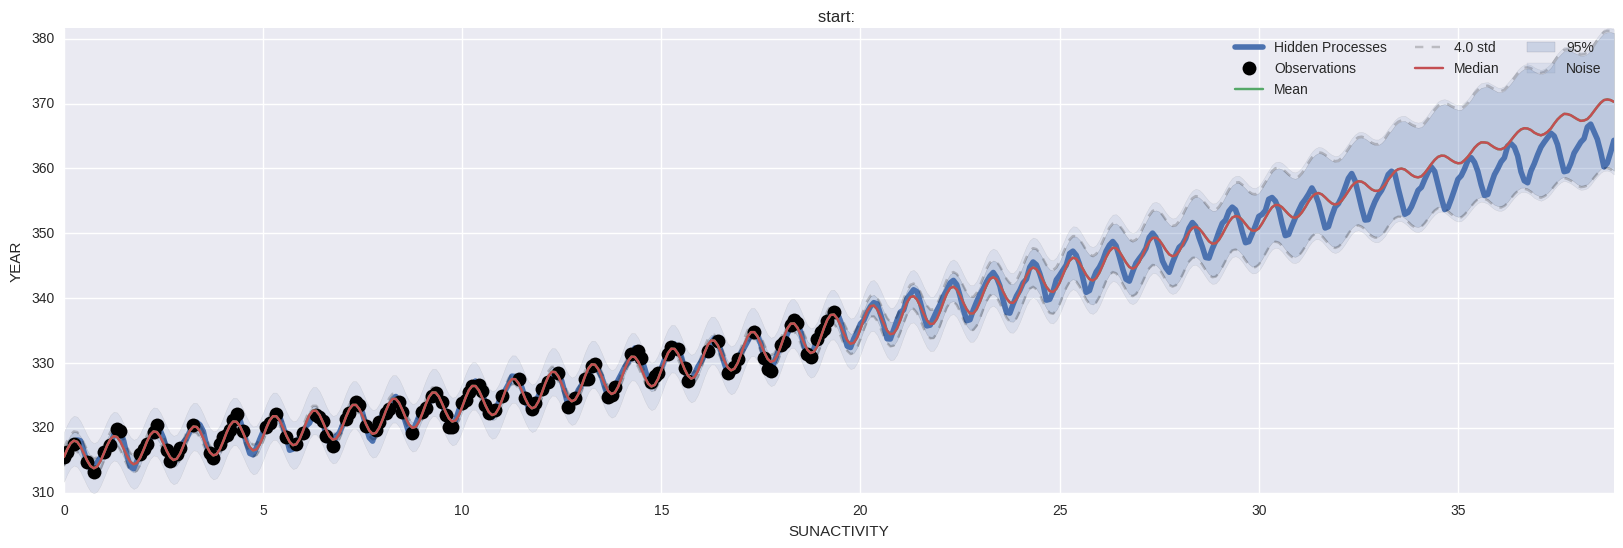

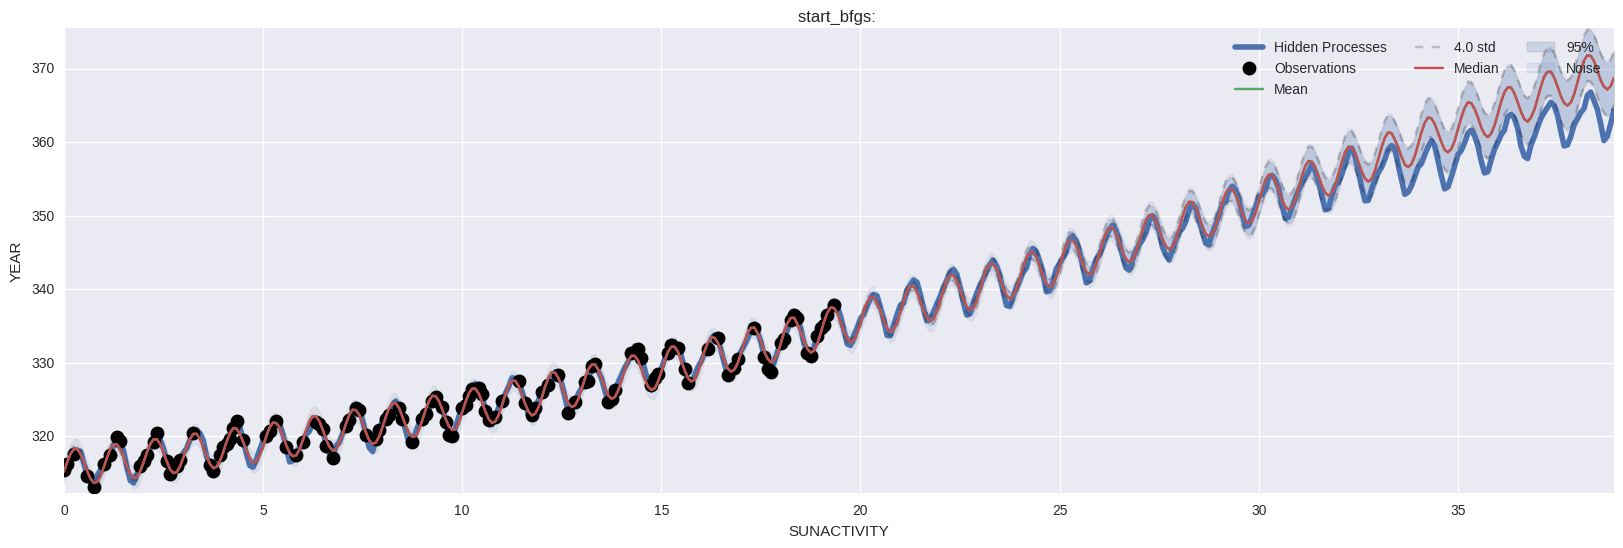

Optimization terminated successfully.
         Current function value: 145.981781
         Iterations: 5
         Function evaluations: 995


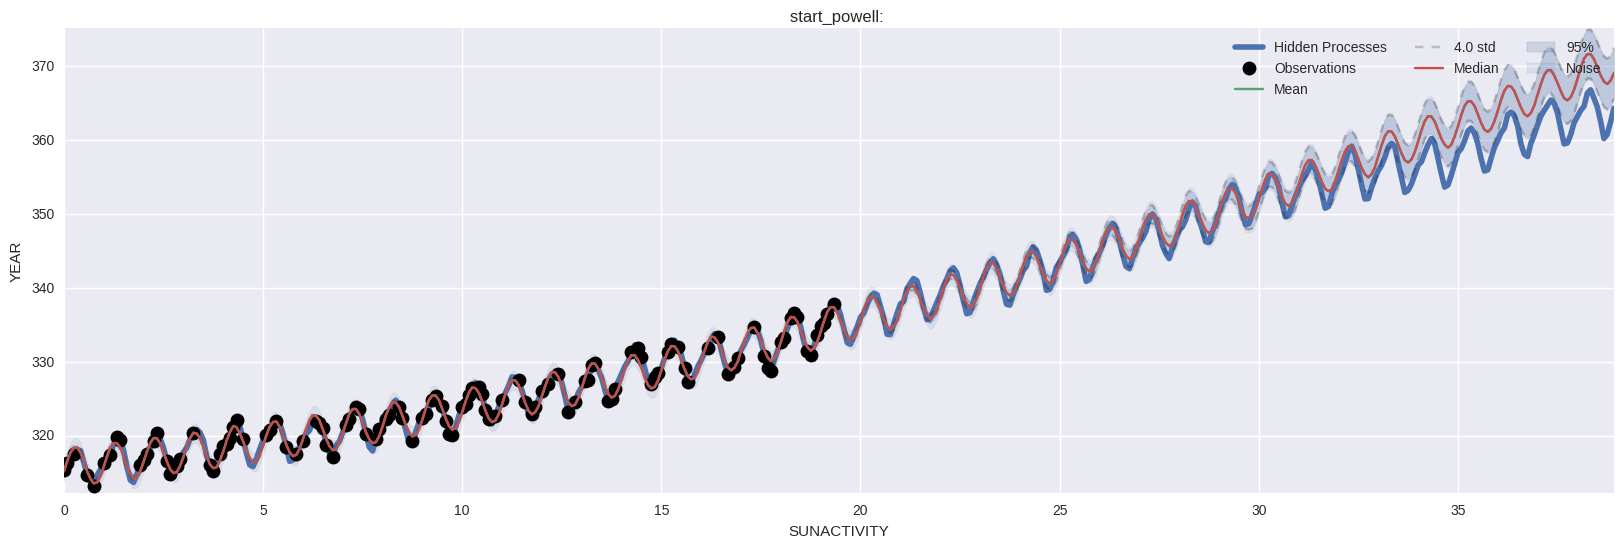

         Current function value: 147.128859
         Iterations: 0
         Function evaluations: 90
         Gradient evaluations: 78


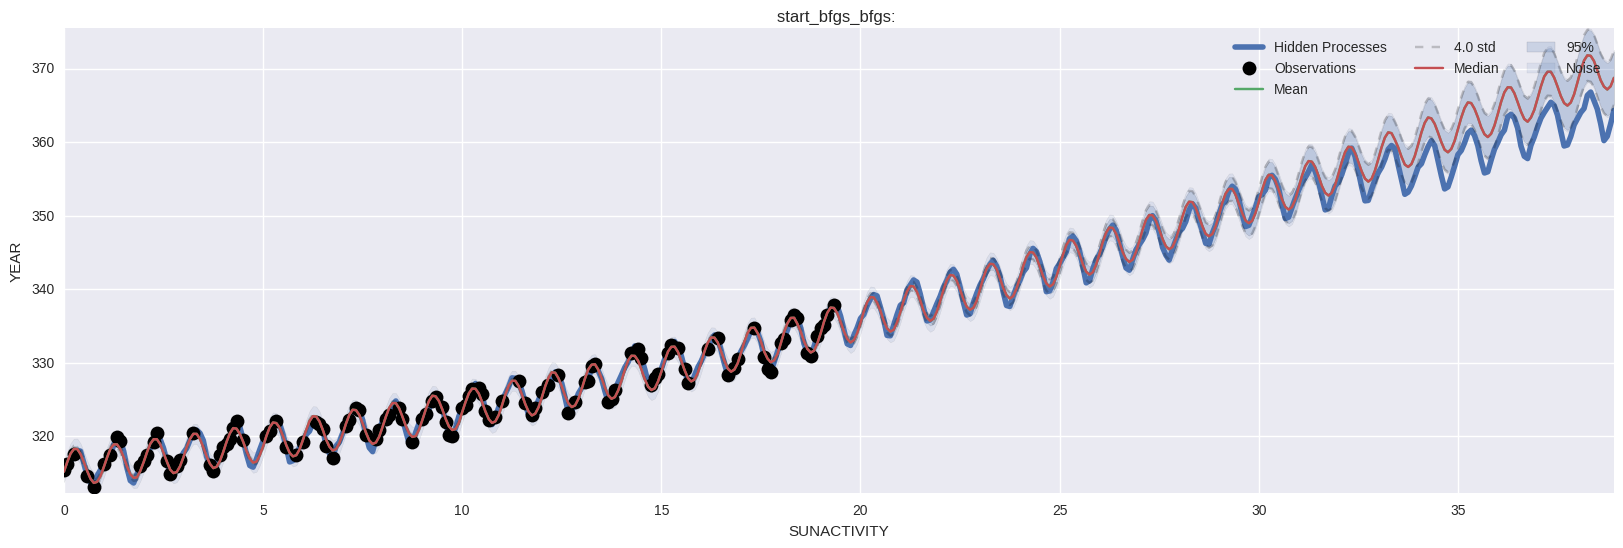

Optimization terminated successfully.
         Current function value: 144.906486
         Iterations: 3
         Function evaluations: 656


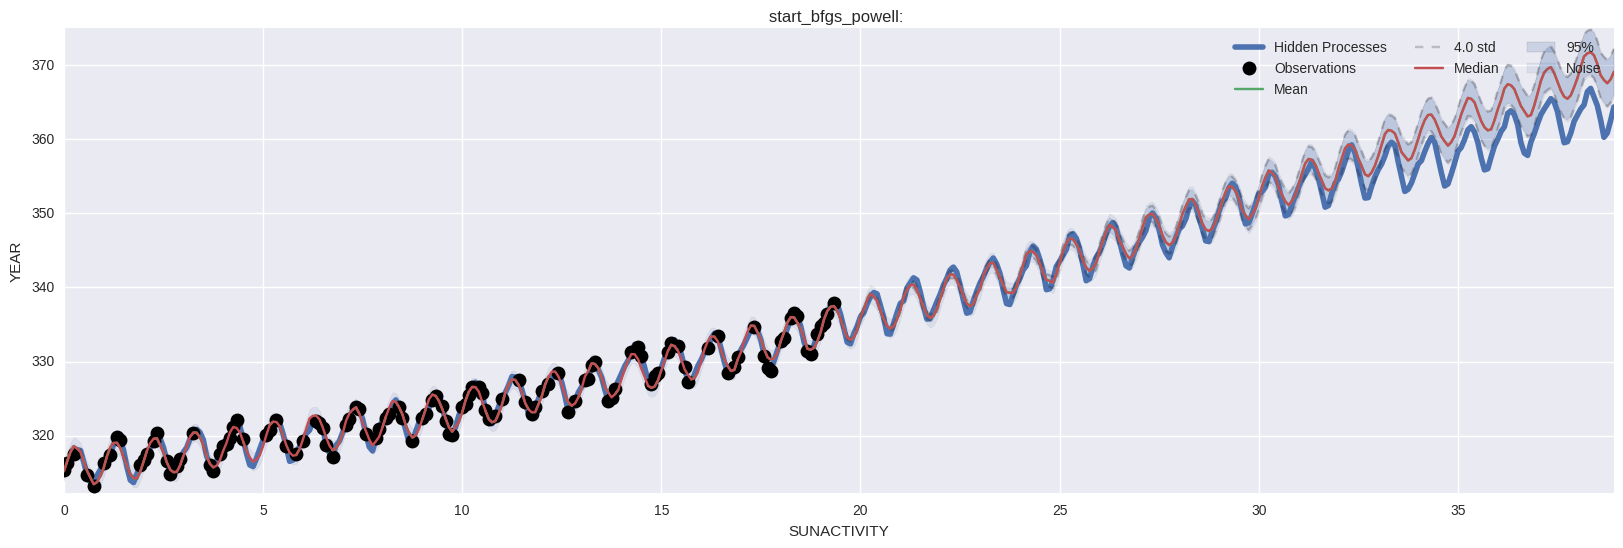

         Current function value: 145.981781
         Iterations: 0
         Function evaluations: 77
         Gradient evaluations: 65


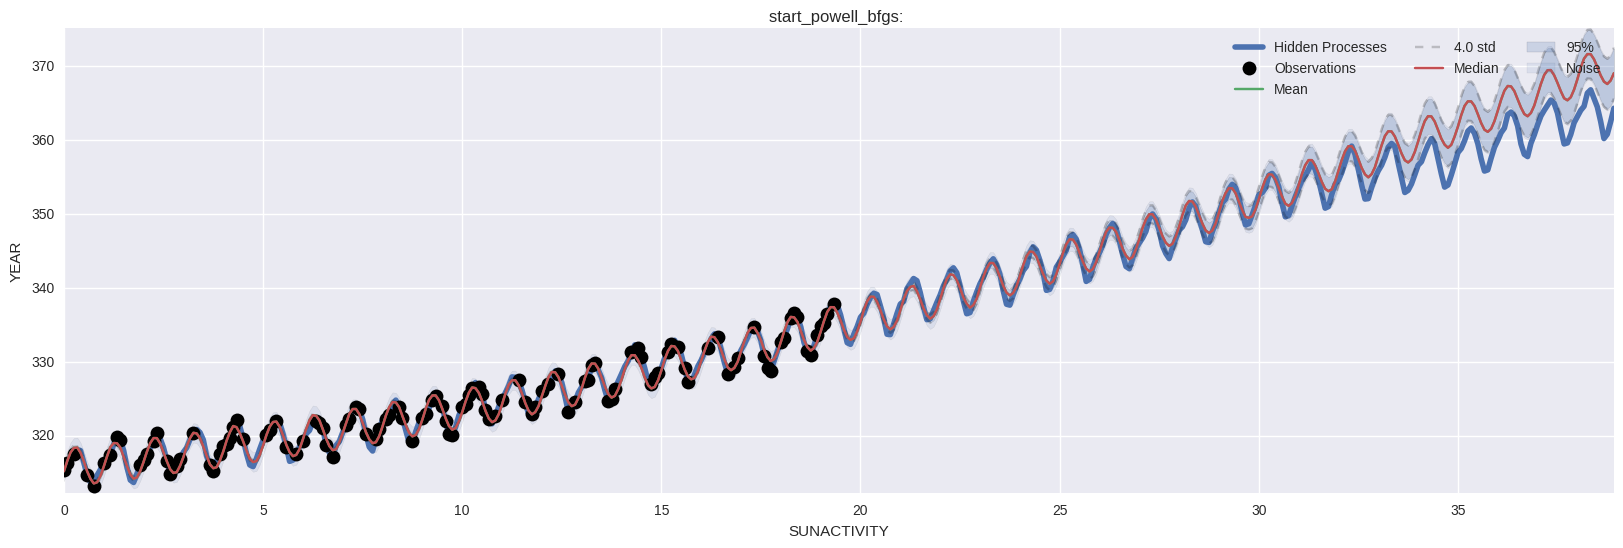

Optimization terminated successfully.
         Current function value: 145.981772
         Iterations: 1
         Function evaluations: 274


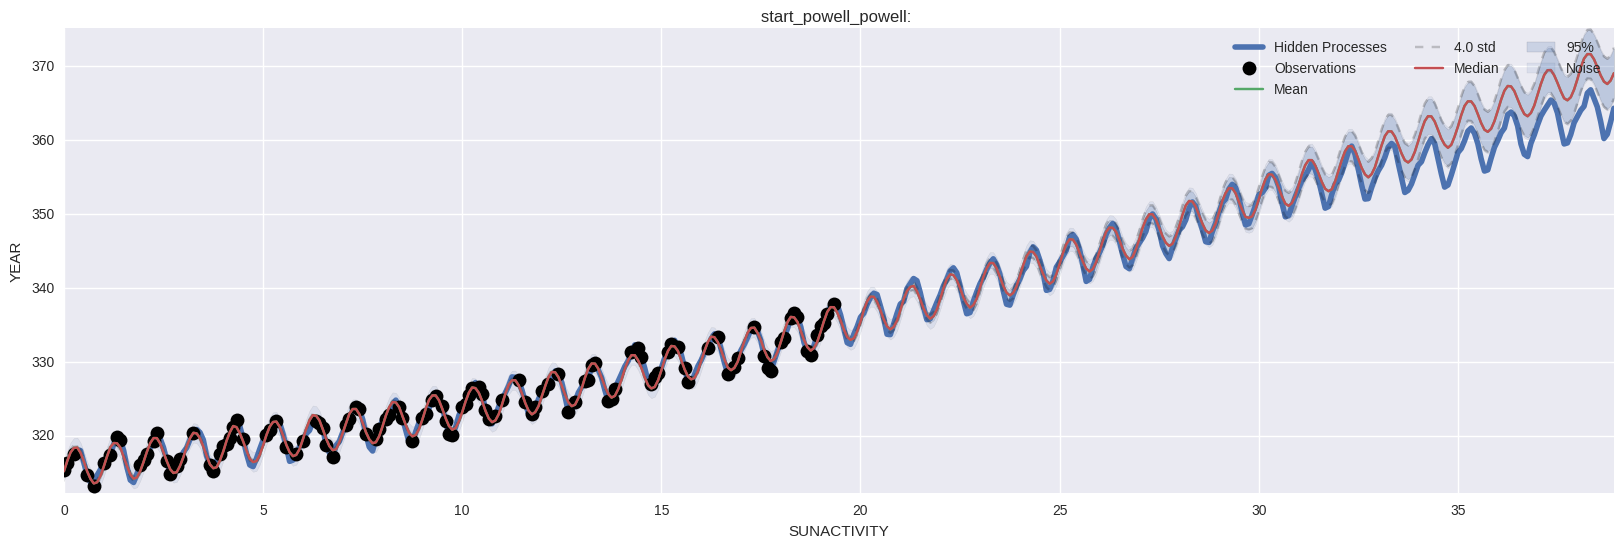

In [22]:
points = gp.find_MAP(start=gp.get_params(), points=6, plot=True, samples=0)

In [25]:
points[-1]

('start_powell_powell',
 array(-145.98177201056052),
 {'ARD_DotBias_Scales_log_': array([ 1.71803951], dtype=float32),
  'GP_Noise_Var_log_': array(-0.8426125645637512, dtype=float32),
  'GP_POL_ARD_DotBias_Bias_log_': array([ 5.32182598], dtype=float32),
  'GP_SM1_PER_log_': array([-0.00046816], dtype=float32),
  'GP_SM1_SCALE_log_': array([ 32.68655014], dtype=float32),
  'GP_SM1_Var_log_': array(0.30453649163246155, dtype=float32),
  'GP_SM2_PER_log_': array([-2.39786148], dtype=float32),
  'GP_SM2_SCALE_log_': array([ 46.90262222], dtype=float32),
  'GP_SM2_Var_log_': array(0.7350019216537476, dtype=float32)})

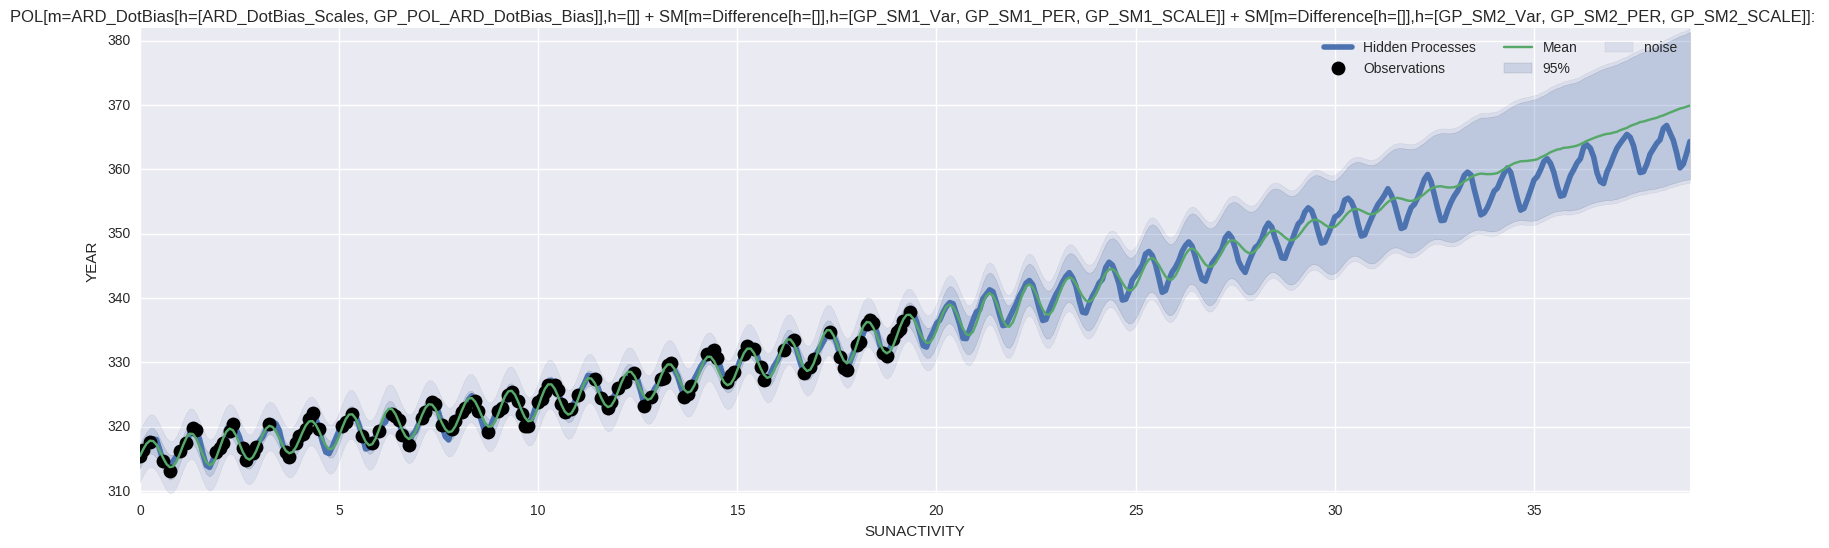

In [31]:
gp.plot_gp(gp.get_params())

In [34]:
gp.find_default()

{'ARD_DotBias_Scales_log_': array([ 0.64829087], dtype=float32),
 'GP_Noise_Var_log_': array(3.5533761978149414, dtype=float32),
 'GP_POL_ARD_DotBias_Bias_log_': array([ 3.53861642], dtype=float32),
 'GP_SM1_PER_log_': array([ 2.95751095], dtype=float32),
 'GP_SM1_SCALE_log_': array([-1.79607904], dtype=float32),
 'GP_SM1_Var_log_': array(3.5533761978149414, dtype=float32)}

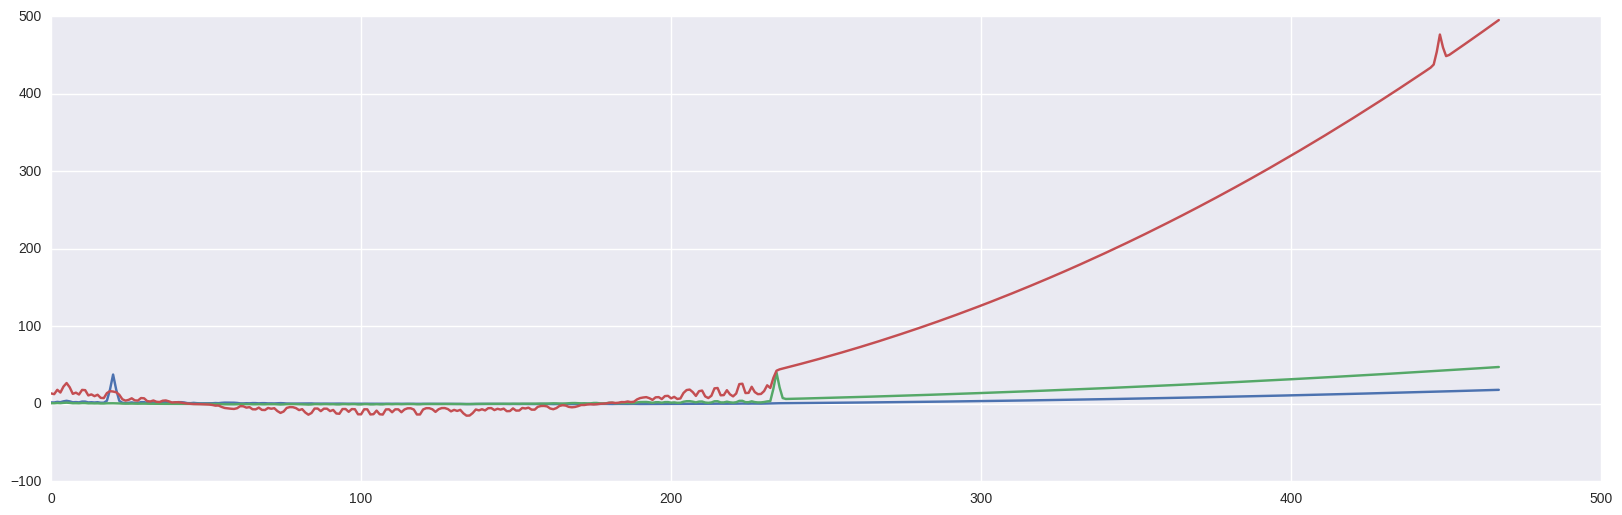

In [16]:
_ = plt.plot(gp.compiles['covariance'](**gp.find_default())[20])
_ = plt.plot(gp.compiles['covariance'](**gp.find_default())[len(x)//2])
_ = plt.plot(gp.compiles['covariance'](**gp.find_default())[-20])

         Current function value: 142.484862
         Iterations: 8
         Function evaluations: 144
         Gradient evaluations: 129


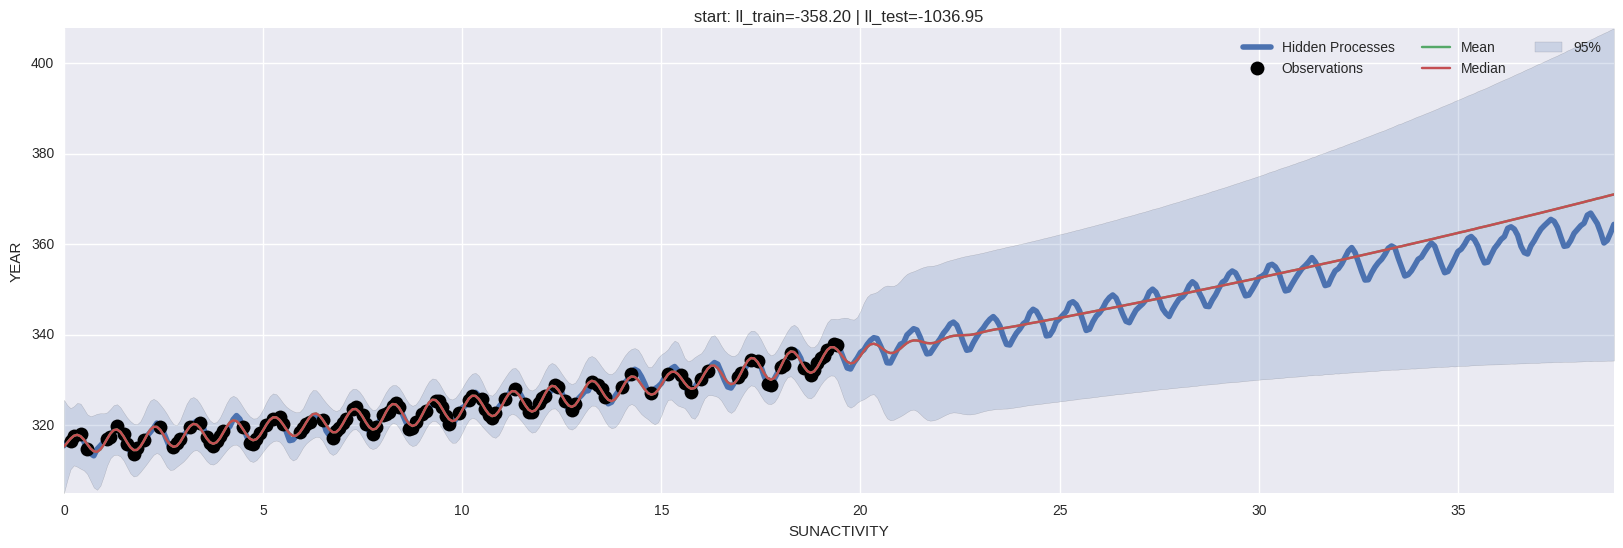

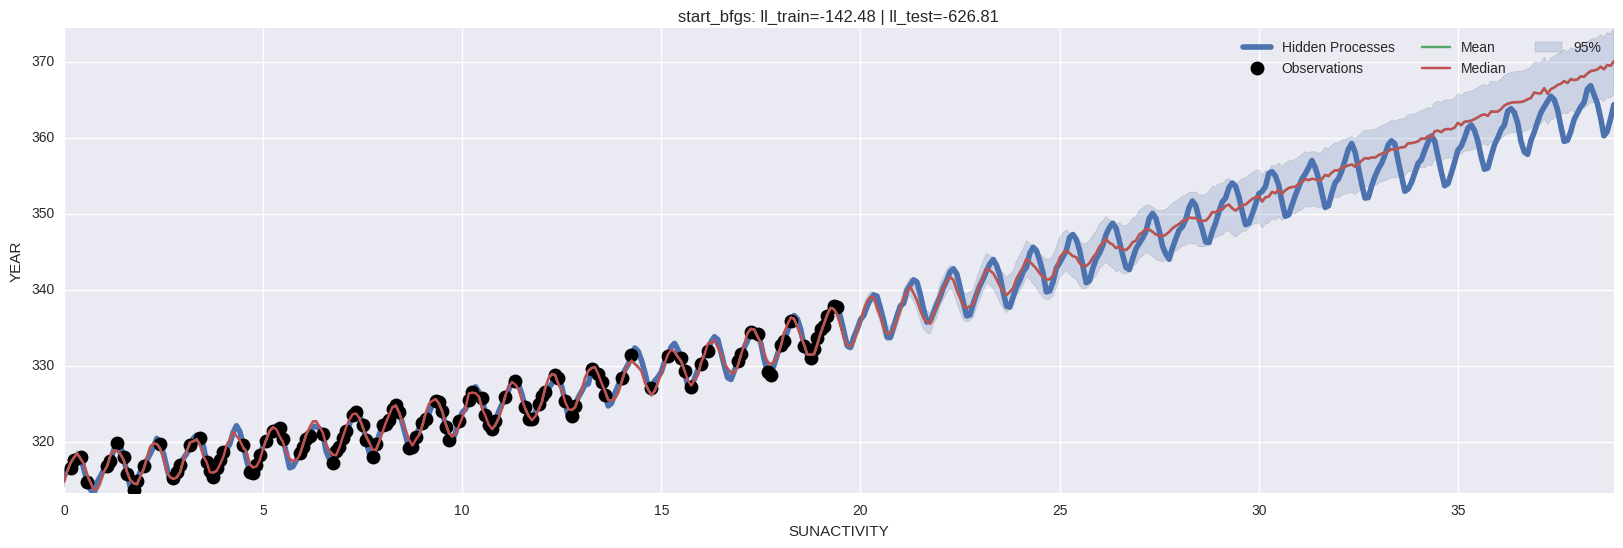

Optimization terminated successfully.
         Current function value: 138.738004
         Iterations: 4
         Function evaluations: 762


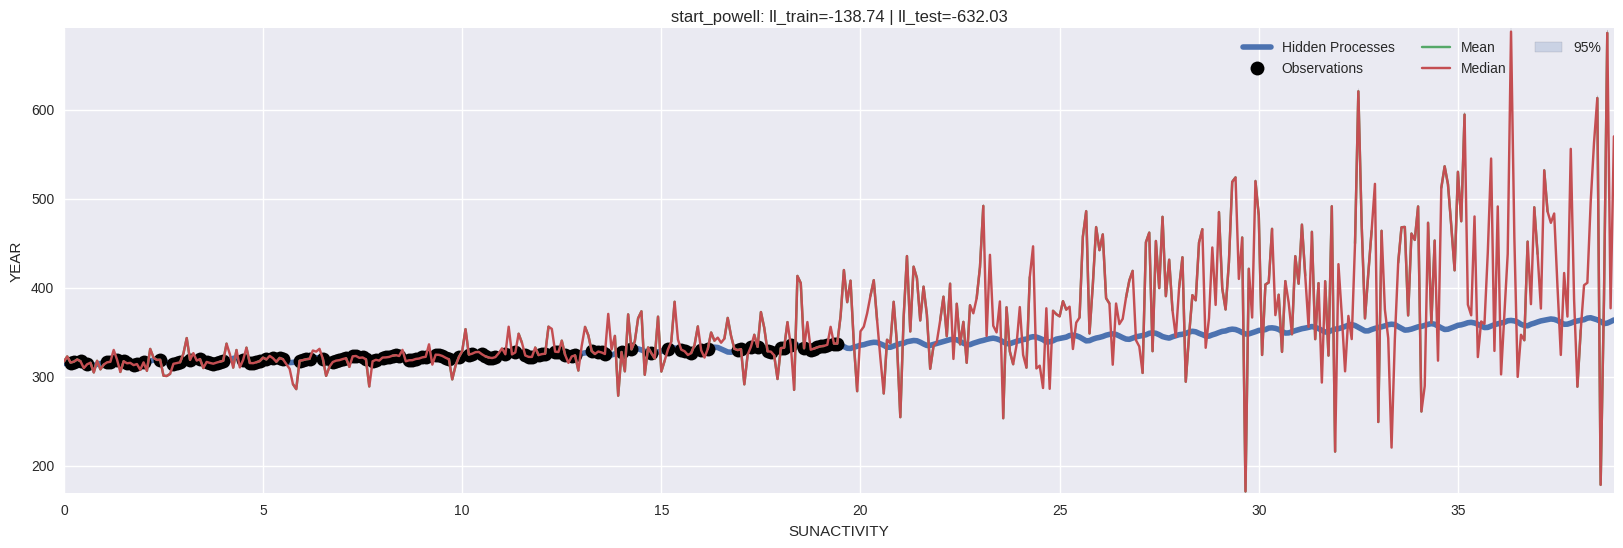

         Current function value: 142.484862
         Iterations: 0
         Function evaluations: 91
         Gradient evaluations: 79


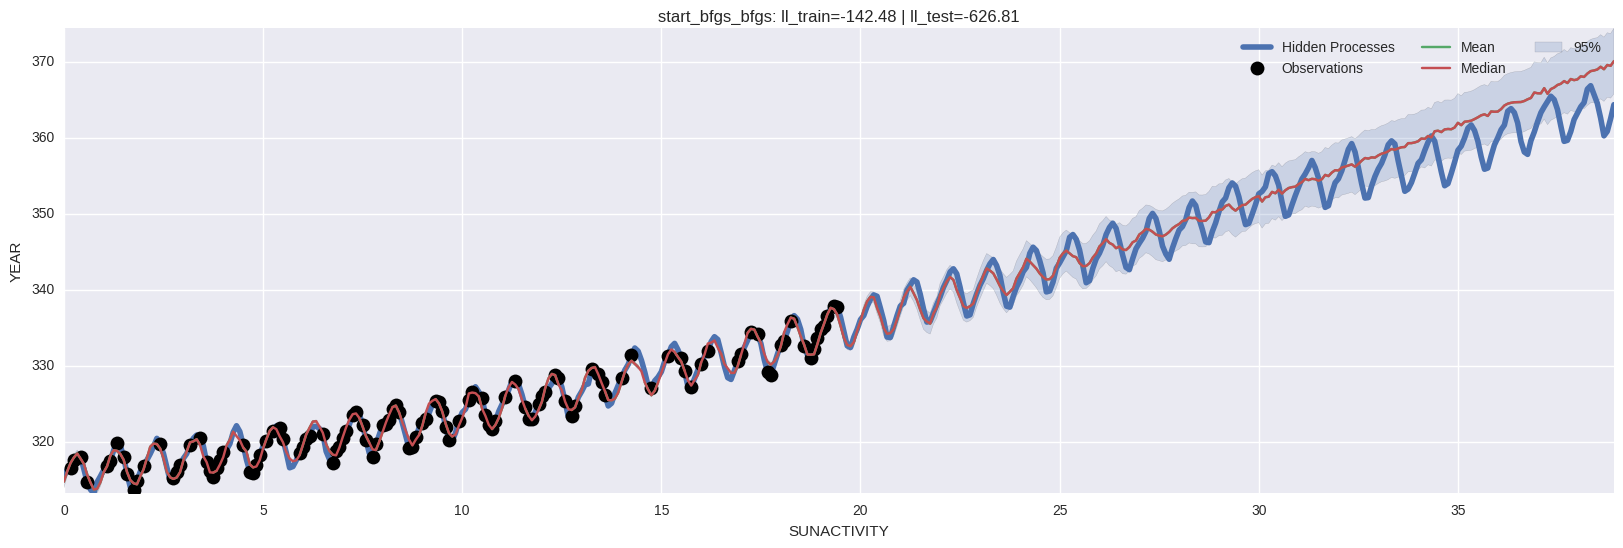

Optimization terminated successfully.
         Current function value: 126.006933
         Iterations: 4
         Function evaluations: 1066


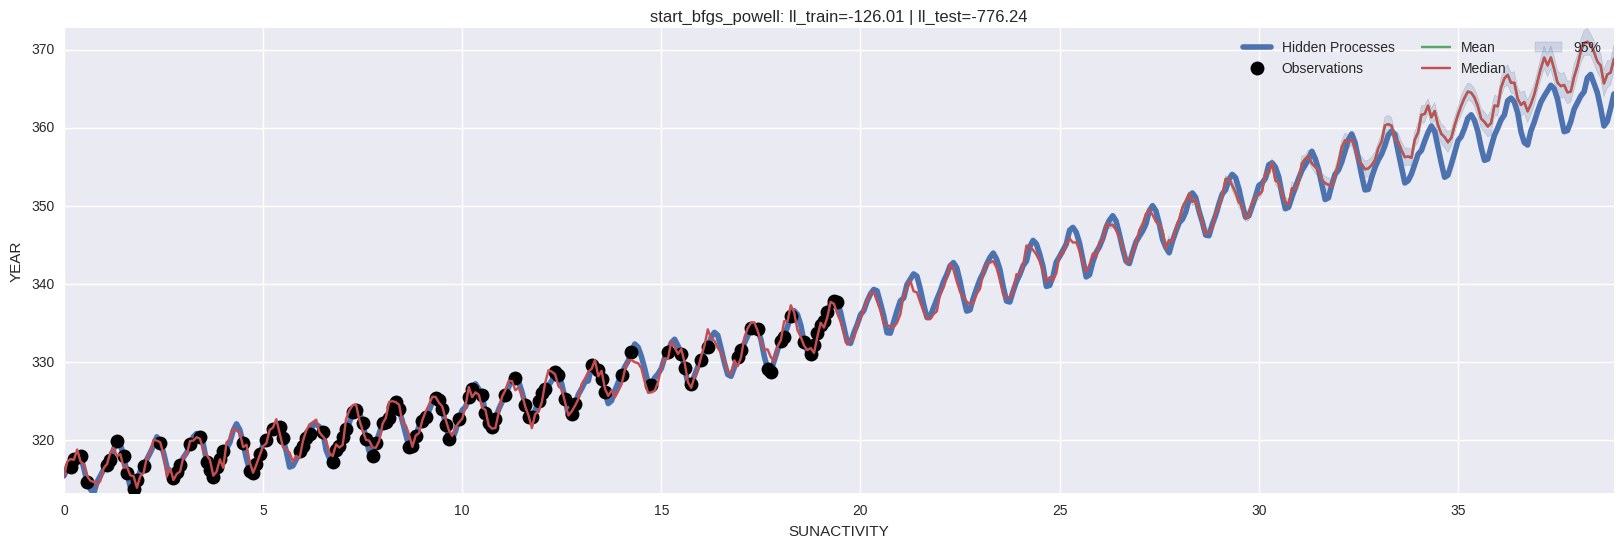

         Current function value: 138.738004
         Iterations: 0
         Function evaluations: 62
         Gradient evaluations: 50


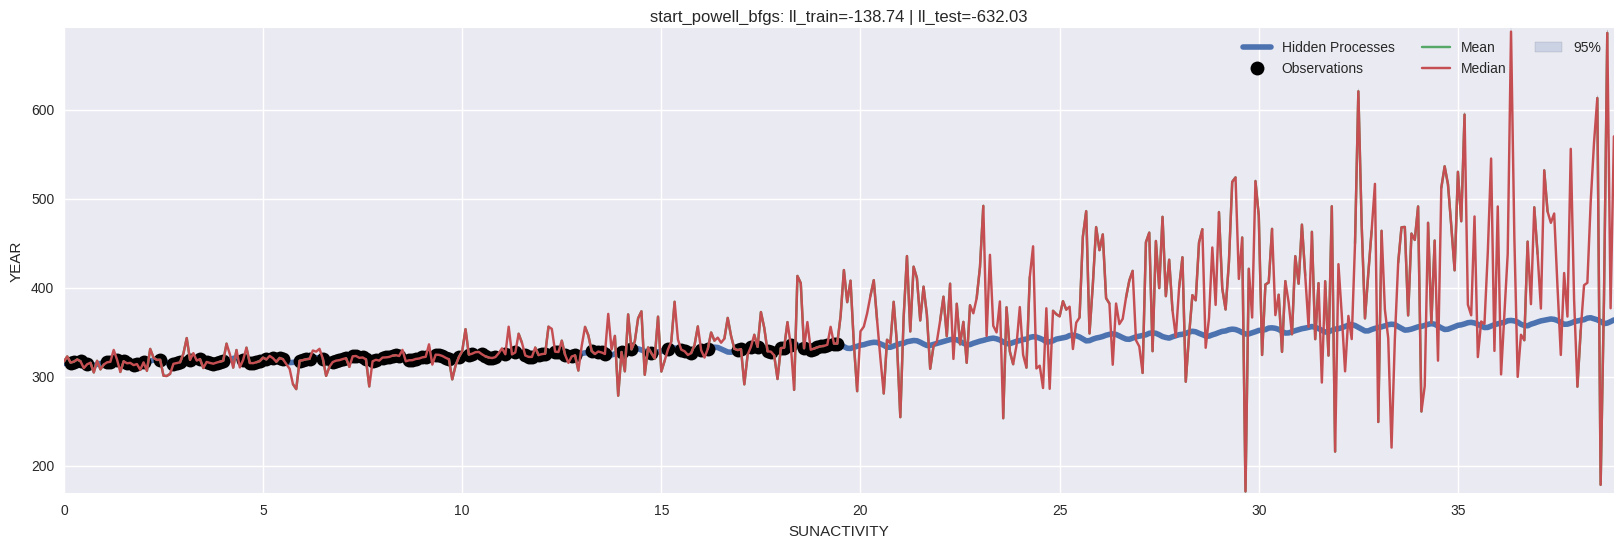

Optimization terminated successfully.
         Current function value: 138.738004
         Iterations: 1
         Function evaluations: 270


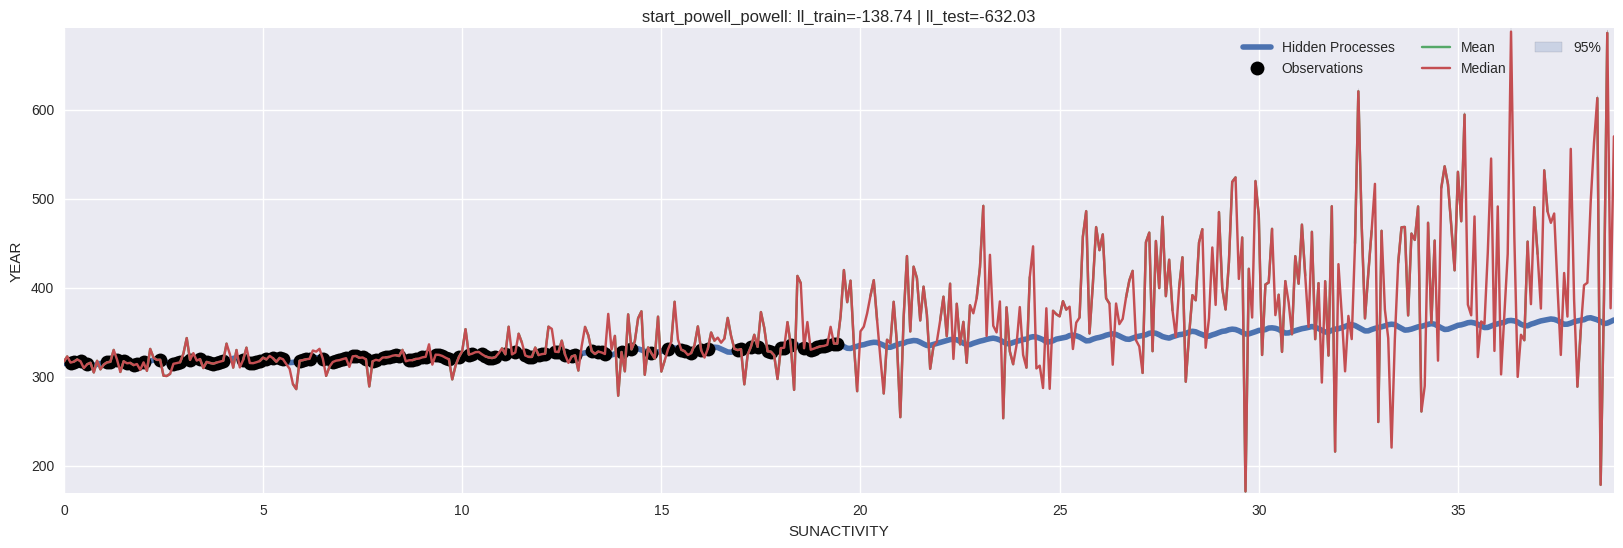

In [24]:
points = gp.find_MAP(start=gp.get_params(),points=6, plot=True, samples=0)

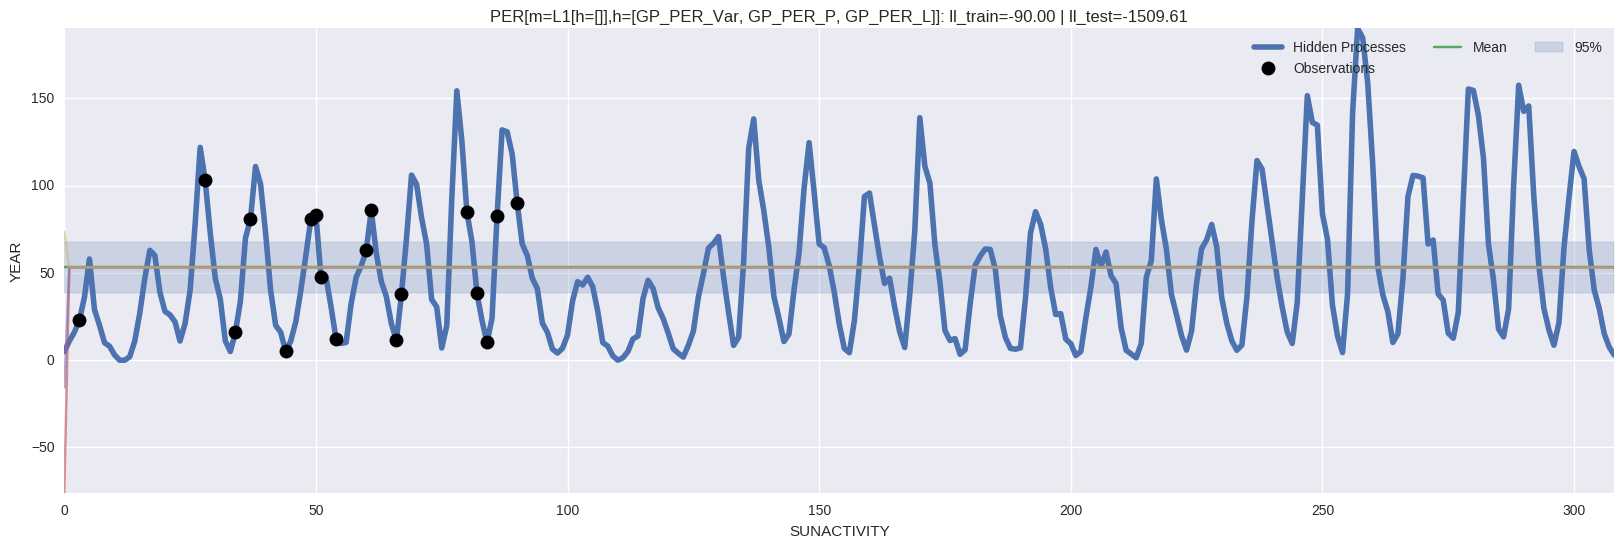

In [40]:
with g3.Model() as model:
    m = g3.Bias()
    k = g3.PER(x)# + g3.SE(x)
    gp = g3.GP(x, m, k, noise=True, hidden=y)
    gp.describe(str(k),'SUNACTIVITY','YEAR')
    gp.observed(x_obs,y_obs)
    gp.testing(x_test,y_test)
    gp.compile()
gp.plot_gp(gp.find_default(), samples=3)

In [ ]:
points = gp.find_MAP(start=gp.get_params(),points=6, plot=True, samples=3)

In [ ]:
with g3.Model() as model:
    m = g3.Bias()
    k = g3.SM(x)
    gp = g3.GP(x, m, k, noise=True, hidden=y)
    gp.describe(str(k),'SUNACTIVITY','YEAR')
    gp.observed(x_obs,y_obs)
    gp.testing(x_test,y_test)
    gp.compile()
gp.plot_gp(gp.find_default(), samples=3)

In [ ]:
gp.widget_params()

In [ ]:
points = gp.find_MAP(start=gp.get_params(),points=6, plot=True, samples=3)

In [ ]:
with g3.Model() as model:
    m = g3.Bias()
    k = g3.SM(x, name='SM1')+g3.SM(x, name='SM2')
    gp = g3.GP(x, m, k, noise=True, hidden=y)
    gp.describe(str(k),'SUNACTIVITY','YEAR')
    gp.observed(x_obs,y_obs)
    gp.testing(x_test,y_test)
    gp.compile()
gp.plot_gp(gp.find_default(), samples=3)

In [ ]:
gp.widget_params()

In [ ]:
points = gp.find_MAP(start=gp.get_params(),points=6, plot=True, samples=3)

In [25]:
name, logp, params = points[-1]

In [26]:
traces = gp.sample_hypers(params, samples=10000,advi=False)

  3%|▎         | 277/10000 [02:26<1:27:48,  1.85it/s]

In [27]:
g3.save_trace(traces)

PicklingError: Can't pickle <class 'g3py.tgp.GP'>: it's not the same object as g3py.tgp.GP

In [28]:
traces.varnames.clear()
for v in gp.model.vars:
    traces.varnames.append(v.name)
traces.varnames

['GP_POL_Var_log_',
 'ARD_DotBias_Scales_log_',
 'GP_POL_ARD_DotBias_Bias_log_',
 'GP_SM1_Var_log_',
 'GP_SM1_PER_log_',
 'GP_SM1_SCALE_log_',
 'GP_SM2_Var_log_',
 'GP_SM2_PER_log_',
 'GP_SM2_SCALE_log_',
 'GP_Noise_Var_log_']

In [44]:
g3.style_seaborn()
pm.traceplot(traces, plot_transformed=False)

IndexError: index out of range

In [ ]:
datatraces = g3.datatrace(model, traces)
g3.save_datatrace(datatraces)
datatraces.describe().T

In [ ]:
items_ll = ['niter','ll']
items_k1 = ['GP_SM1_M','GP_SM1_S_log_','GP_SM1_Var_log_']
items_k2 = ['GP_SM2_M','GP_SM2_S_log_','GP_SM2_Var_log_']
items_m = ['GP_Bias_Constant','GP_Noise_Var_log_']

g3.plot_datatrace(datatraces,items_ll+items_k1)
g3.plot_datatrace(datatraces,items_ll+items_k2)
g3.plot_datatrace(datatraces,items_ll+items_m)


g3.plot_datatrace(datatraces,items_k1+items_k2)
g3.plot_datatrace(datatraces,items_k1+items_m)
g3.plot_datatrace(datatraces,items_k2+items_m)




In [ ]:
gp.widget_trace(traces)

In [ ]:
tgp.plot_tgp(tgp.get_params(), samples=10)